# Expected Goals Model
### Zach Andrews
### ztandrews18@sbcglobal.net
### github.com/ztandrews
---
##### Expected goals model creation

In [2]:
#Import Modules
import pandas as pd
import numpy as np
import pickle

In [3]:
#Join all datasets. Only run if you re-did scraping for every other season. If not just use all_shots_clean
shots2010 = pd.read_csv('season_shots/2010_shots_clean.csv')
shots2011 = pd.read_csv('season_shots/2011_shots_clean.csv')
shots2012 = pd.read_csv('season_shots/2012_shots_clean.csv')
shots2013 = pd.read_csv('season_shots/2013_shots_clean.csv')
shots2014 = pd.read_csv('season_shots/2014_shots_clean.csv')
shots2015 = pd.read_csv('season_shots/2015_shots_clean.csv')
shots2016 = pd.read_csv('season_shots/2016_shots_clean.csv')
shots2017 = pd.read_csv('season_shots/2017_shots_clean.csv')
shots2018 = pd.read_csv('season_shots/2018_shots_clean.csv')
shots2019 = pd.read_csv('season_shots/2019_shots_clean.csv')
shots2020 = pd.read_csv('season_shots/2020_shots_clean.csv')
shots2021 = pd.read_csv('season_shots/2021_shots_clean.csv')
shots2022 = pd.read_csv('season_shots/2022_shots_clean.csv')
allshots = pd.DataFrame()
allshots = allshots.append(shots2010)
allshots = allshots.append(shots2011)
allshots = allshots.append(shots2012)
allshots = allshots.append(shots2013)
allshots = allshots.append(shots2014)
allshots = allshots.append(shots2015)
allshots = allshots.append(shots2016)
allshots = allshots.append(shots2017)
allshots = allshots.append(shots2018)
allshots = allshots.append(shots2019)
allshots = allshots.append(shots2020)
allshots = allshots.append(shots2021)
allshots = allshots.append(shots2022)
allshots = allshots.drop('Unnamed: 0', axis=1)
allshots['shot_ID'] = np.arange(len(allshots))
allshots.to_csv("season_shots/all_shots_clean.csv")

In [3]:
allshots = pd.read_csv("season_shots/all_shots_clean.csv")
allshots = allshots.drop('Unnamed: 0', axis=1)
allshots

,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,Type,...,isRebound,isRush,isOnEmptyNet,homeSkatersOnIce,awaySkatersOnIce,Strength_Mapped,strength_Even,strength_Advantage,strength_Short_Handed,shot_ID
0,20003,2010-10-07,1,SHOT,"CAR ONGOAL - #12 STAAL, Snap, Off. Zone, 37 ft.",1:05,65.0,5x5,Off,SNAP SHOT,...,0,0,0,5,5,even,1,0,0,0
1,20003,2010-10-07,1,MISS,"CAR #6 GLEASON, Wrist, Wide of Net, Off. Zone,...",1:16,76.0,5x5,Off,WRIST SHOT,...,0,0,0,5,5,even,1,0,0,1
2,20003,2010-10-07,1,MISS,"MIN #23 NYSTROM, Wrist, Wide of Net, Off. Zone...",1:37,97.0,5x5,Off,WRIST SHOT,...,0,0,0,5,5,even,1,0,0,2
3,20003,2010-10-07,1,GOAL,"MIN #48 LATENDRESSE(1), Wrist, Off. Zone, 12 f...",3:33,213.0,5x5,Off,WRIST SHOT,...,0,0,0,5,5,even,1,0,0,3
4,20003,2010-10-07,1,SHOT,"MIN ONGOAL - #8 BURNS, Wrist, Off. Zone, 52 ft.",3:53,233.0,5x5,Off,WRIST SHOT,...,0,0,0,5,5,even,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306670,20611,2023-01-04,3,SHOT,"DAL ONGOAL - #53 JOHNSTON, Wrist, Neu. Zone, 9...",16:59,1019.0,5x5,Neu,WRIST SHOT,...,0,0,0,5,5,even,1,0,0,1306670
1306671,20611,2023-01-04,3,SHOT,"DAL ONGOAL - #16 PAVELSKI, Wrist, Off. Zone, 1...",19:13,1153.0,4x5,Off,WRIST SHOT,...,1,0,0,4,6,advantage,0,1,0,1306671
1306672,20611,2023-01-04,3,MISS,"DAL #16 PAVELSKI, Slap, Wide of Net, Off. Zone...",19:43,1183.0,4x5,Off,SLAP SHOT,...,0,0,0,4,6,advantage,0,1,0,1306672
1306673,20611,2023-01-04,3,SHOT,"DAL ONGOAL - #14 BENN, Tip-In, Off. Zone, 8 ft.",19:54,1194.0,4x5,Off,TIP-IN,...,1,0,0,4,6,advantage,0,1,0,1306673


In [26]:
allshots.to_csv("season_shots/all_shots_clean.csv")

In [17]:
#Select features
'''
model_data = allshots[['Period','xCordAdjusted','yCordAdjusted','isHomeTeam','shotDistance','shotAngle','goal','lastEventxCordAdjusted','lastEventyCordAdjusted','lastEvent_SameTeamShot'
                      ,'lastEvent_OpponentShot','lastEvent_SameTeamMiss','lastEvent_OpponentMiss','lastEvent_SameTeamGive','lastEvent_OpponentGive','lastEvent_SameTeamTake','lastEvent_OpponentTake'
                      ,'lastEvent_SameTeamHit','lastEvent_OpponentHit','lastEvent_Faceoff','timeSinceLastEvent','shotType_Wrist','shotType_Snap','shotType_Slap','shotType_Backhand','shotType_Wrap'
                      ,'shotType_Tip','shotType_Deflected','scoreState_Tie','scoreState_Down1','scoreState_Down2','scoreState_Down3','scoreState_Down4','scoreState_Down5Plus'
                      ,'scoreState_Up1','scoreState_Up2','scoreState_Up3','scoreState_Up4','scoreState_Up5Plus','isRebound','isRush','strength_Even','strength_Advantage','strength_Short_Handed','distanceFromLast']]
model_data
'''
model_data = allshots[['Period','xCordAdjusted','yCordAdjusted','isHomeTeam','shotDistance','shotAngle','goal','lastEventxCordAdjusted','lastEventyCordAdjusted','lastEvent_SameTeamShot'
                      ,'lastEvent_OpponentShot','lastEvent_SameTeamMiss','lastEvent_OpponentMiss','lastEvent_SameTeamGive','lastEvent_OpponentGive','lastEvent_SameTeamTake','lastEvent_OpponentTake'
                      ,'lastEvent_SameTeamHit','lastEvent_OpponentHit','lastEvent_Faceoff','timeSinceLastEvent','shotType_Wrist','shotType_Snap','shotType_Slap','shotType_Backhand','shotType_Wrap'
                      ,'shotType_Tip','shotType_Deflected','isRebound','isRush','strength_Even','strength_Advantage','strength_Short_Handed','distanceFromLast']]
model_data

,Period,xCordAdjusted,yCordAdjusted,isHomeTeam,shotDistance,shotAngle,goal,lastEventxCordAdjusted,lastEventyCordAdjusted,lastEvent_SameTeamShot,...,shotType_Backhand,shotType_Wrap,shotType_Tip,shotType_Deflected,isRebound,isRush,strength_Even,strength_Advantage,strength_Short_Handed,distanceFromLast
0,1,56.0,-15.0,0,36.249138,24.443955,0,20.0,-22.0,0,...,0,0,0,0,0,0,1,0,0,36.674242
1,1,35.0,33.0,0,63.285069,31.429566,0,56.0,-15.0,1,...,0,0,0,0,0,0,1,0,0,52.392748
2,1,87.0,-6.0,1,6.324555,71.565051,0,20.0,22.0,0,...,0,0,0,0,0,0,1,0,0,72.615425
3,1,78.0,3.0,1,11.401754,15.255119,1,-69.0,22.0,0,...,0,0,0,0,0,0,1,0,0,148.222805
4,1,54.0,38.0,1,51.662365,47.353297,0,69.0,22.0,0,...,0,0,0,0,0,0,1,0,0,21.931712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306670,3,-3.0,9.0,0,92.439169,5.587244,0,-77.0,36.0,0,...,0,0,0,0,0,0,1,0,0,78.771822
1306671,3,80.0,12.0,0,15.000000,53.130102,0,64.0,-1.0,0,...,0,0,0,0,1,0,0,1,0,20.615528
1306672,3,79.0,19.0,0,21.470911,62.241459,0,75.0,-2.0,0,...,0,0,0,0,0,0,0,1,0,21.377558
1306673,3,81.0,3.0,0,8.544004,20.556045,0,81.0,20.0,0,...,0,0,1,0,1,0,0,1,0,17.000000


In [18]:
#Train Test Split, 70% training 30% testing
X = model_data[model_data.columns.difference(['goal'])]
y = model_data[['goal']]
X_train = X[:878242]
y_train = y[:878242]
X_test = X[878242:]
y_test = y[878242:]

In [49]:
#Model
from xgboost import XGBClassifier

In [8]:
#Parameter Tuning
params = {
    'eval_metric' : ['auc'],
    'objective' : ["binary:logistic"],
    "subsample":[0.5, 0.75, 1],
    "colsample_bytree":[0.5, 0.75, 1],
    "max_depth":[6,15,20],
    "min_child_weight":[1,5,15],
    "n_estimators":[100,150,200]
}

In [46]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
classifier=XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=4,cv=5,verbose=3)
random_search.fit(X_train,y_train)

NameError: name 'params' is not defined

In [20]:
random_search.best_params_

{'subsample': 1,
 'objective': 'binary:logistic',
 'n_estimators': 150,
 'min_child_weight': 5,
 'max_depth': 6,
 'eval_metric': 'auc',
 'colsample_bytree': 0.5}

In [50]:
#Create model using best params
xgb = XGBClassifier(objective = "binary:logistic",max_depth=6,n_estimators=150,min_child_weight=5,eval_metric='auc')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [51]:
#Apply to testing sets
xgb_pred = xgb.predict(X_test)
xgb_pred_proba = xgb.predict_proba(X_test)

Testing confusion matrix:

AUC Score:
0.7661609870139261

Tesitng Classificaion Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97    400023
           1       0.50      0.02      0.04     28410

    accuracy                           0.93    428433
   macro avg       0.71      0.51      0.50    428433
weighted avg       0.91      0.93      0.90    428433



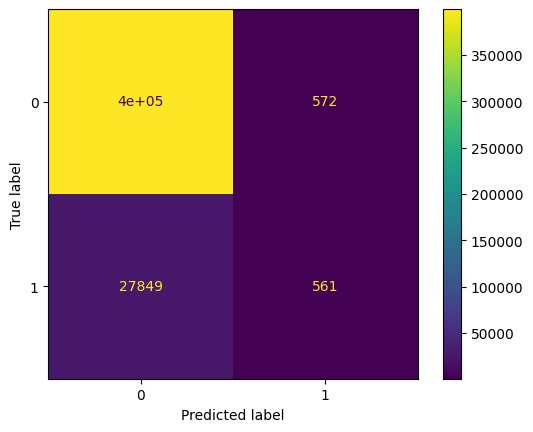

In [52]:
#Evaluations
from sklearn import metrics
from sklearn.metrics import roc_auc_score
print("Testing confusion matrix:")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred)
print("\nAUC Score:")
print(roc_auc_score(y_test.values.ravel(), xgb_pred_proba[:,1], multi_class='ovr'))
print("\nTesitng Classificaion Report:")
print(metrics.classification_report(y_test, xgb_pred))

In [53]:
#Get feature importance of our model
importances = xgb.feature_importances_

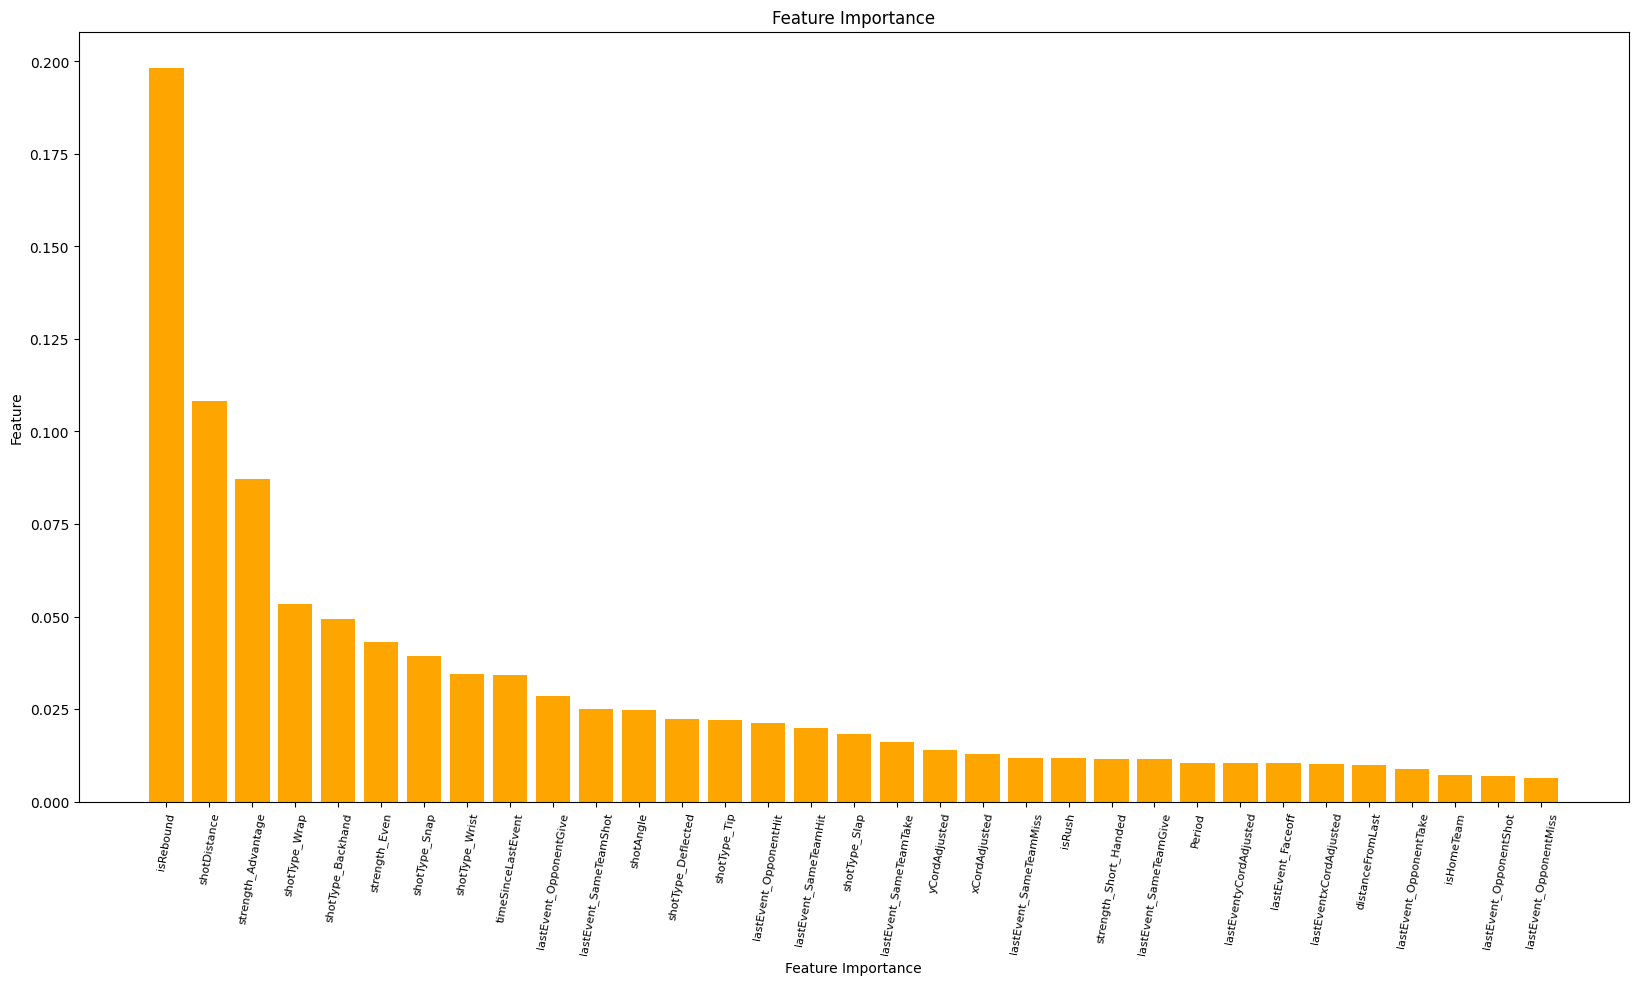

In [105]:
#Chart of feature importances
fig = plt.subplots(figsize=(20,10))
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Barplot: Add bars
plt.bar(range(X.shape[1]), importances[indices], color='orange')
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=80, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
# Show plot
plt.show()

In [109]:
#Save model
#filename = 'xgb_model.sav'
#pickle.dump(xgb, open(filename,'wb'))

In [20]:
filename = 'xgb_model.sav'
xgb = pickle.load(open(filename, 'rb'))
xgb

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [21]:
#Create a new data frame to add all shots with their xG values to
X_with_xgoals = X
X_with_xgoals = X_with_xgoals.reset_index()
X_with_xgoals

,index,Period,distanceFromLast,isHomeTeam,isRebound,isRush,lastEvent_Faceoff,lastEvent_OpponentGive,lastEvent_OpponentHit,lastEvent_OpponentMiss,...,shotType_Snap,shotType_Tip,shotType_Wrap,shotType_Wrist,strength_Advantage,strength_Even,strength_Short_Handed,timeSinceLastEvent,xCordAdjusted,yCordAdjusted
0,0,1,36.674242,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,57.0,56.0,-15.0
1,1,1,52.392748,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,11.0,35.0,33.0
2,2,1,72.615425,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,13.0,87.0,-6.0
3,3,1,148.222805,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,25.0,78.0,3.0
4,4,1,21.931712,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,3.0,54.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306670,1306670,3,78.771822,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,22.0,-3.0,9.0
1306671,1306671,3,20.615528,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,2.0,80.0,12.0
1306672,1306672,3,21.377558,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,16.0,79.0,19.0
1306673,1306673,3,17.000000,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,2.0,81.0,3.0


In [22]:
#Predict the xG value for every shot taken from 2010-2021
all_xg = xgb.predict_proba(X)[:,1]
all_xg

array([0.0361134 , 0.00970404, 0.07433446, ..., 0.08523021, 0.3063509 ,
       0.15858439], dtype=float32)

In [23]:
#Create data frame of every xG value
all_xg_df = pd.DataFrame(all_xg,columns=['xG'])
all_xg_df

,xG
0,0.036113
1,0.009704
2,0.074334
3,0.142534
4,0.018330
...,...
1306670,0.006958
1306671,0.331398
1306672,0.085230
1306673,0.306351


In [25]:
#Join shots with their xG values based on index
merged = X_with_xgoals.join(all_xg_df)
merged

,index,Period,distanceFromLast,isHomeTeam,isRebound,isRush,lastEvent_Faceoff,lastEvent_OpponentGive,lastEvent_OpponentHit,lastEvent_OpponentMiss,...,shotType_Tip,shotType_Wrap,shotType_Wrist,strength_Advantage,strength_Even,strength_Short_Handed,timeSinceLastEvent,xCordAdjusted,yCordAdjusted,xG
0,0,1,36.674242,0,0,0,1,0,0,0,...,0,0,0,0,1,0,57.0,56.0,-15.0,0.036113
1,1,1,52.392748,0,0,0,0,0,0,0,...,0,0,1,0,1,0,11.0,35.0,33.0,0.009704
2,2,1,72.615425,1,0,0,1,0,0,0,...,0,0,1,0,1,0,13.0,87.0,-6.0,0.074334
3,3,1,148.222805,1,0,0,1,0,0,0,...,0,0,1,0,1,0,25.0,78.0,3.0,0.142534
4,4,1,21.931712,1,0,0,1,0,0,0,...,0,0,1,0,1,0,3.0,54.0,38.0,0.018330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306670,1306670,3,78.771822,0,0,0,0,0,0,0,...,0,0,1,0,1,0,22.0,-3.0,9.0,0.006958
1306671,1306671,3,20.615528,0,1,0,0,0,0,0,...,0,0,1,1,0,0,2.0,80.0,12.0,0.331398
1306672,1306672,3,21.377558,0,0,0,0,0,0,0,...,0,0,0,1,0,0,16.0,79.0,19.0,0.085230
1306673,1306673,3,17.000000,0,1,0,0,0,0,0,...,1,0,0,1,0,0,2.0,81.0,3.0,0.306351


In [28]:
#Combine the merged set with data from even_strength_shots, which contains relevent game information
full_data = allshots
full_data = full_data.reset_index()
full_data = full_data[['Game_Id','Date','Event','goal','Home_Team','Away_Team','Ev_Team','Away_Players','Home_Players','Home_Score','Away_Score','Strength_Mapped','homeSkatersOnIce','awaySkatersOnIce',
                      'awayPlayer1','awayPlayer1_id','awayPlayer2','awayPlayer2_id','awayPlayer3','awayPlayer3_id','awayPlayer4',
                       'awayPlayer4_id','awayPlayer5','awayPlayer5_id','awayPlayer6','awayPlayer6_id',
                       'homePlayer1','homePlayer1_id','homePlayer2','homePlayer2_id','homePlayer3','homePlayer3_id','homePlayer4','homePlayer4_id',
                       'homePlayer5','homePlayer5_id','homePlayer6','homePlayer6_id','Home_Goalie','Home_Goalie_Id','Away_Goalie',
                      'Away_Goalie_Id','Home_Coach','Away_Coach','gameSeconds','p1_name','p1_ID','p2_name','p2_ID','p3_name','p3_ID','Type','Description']]
full_data

,Game_Id,Date,Event,goal,Home_Team,Away_Team,Ev_Team,Away_Players,Home_Players,Home_Score,...,Away_Coach,gameSeconds,p1_name,p1_ID,p2_name,p2_ID,p3_name,p3_ID,Type,Description
0,20003,2010-10-07,SHOT,0,MIN,CAR,CAR,6,6,0,...,PAUL MAURICE,65.0,ERIC STAAL,8470595.0,NaN,NaN,NaN,NaN,SNAP SHOT,"CAR ONGOAL - #12 STAAL, Snap, Off. Zone, 37 ft."
1,20003,2010-10-07,MISS,0,MIN,CAR,CAR,6,6,0,...,PAUL MAURICE,76.0,TIM GLEASON,8469476.0,NaN,NaN,NaN,NaN,WRIST SHOT,"CAR #6 GLEASON, Wrist, Wide of Net, Off. Zone,..."
2,20003,2010-10-07,MISS,0,MIN,CAR,MIN,6,6,0,...,PAUL MAURICE,97.0,ERIC NYSTROM,8470180.0,NaN,NaN,NaN,NaN,WRIST SHOT,"MIN #23 NYSTROM, Wrist, Wide of Net, Off. Zone..."
3,20003,2010-10-07,GOAL,1,MIN,CAR,MIN,6,6,0,...,PAUL MAURICE,213.0,GUILLAUME LATENDRESSE,8471670.0,MIKKO KOIVU,8469459.0,KYLE BRODZIAK,8470803.0,WRIST SHOT,"MIN #48 LATENDRESSE(1), Wrist, Off. Zone, 12 f..."
4,20003,2010-10-07,SHOT,0,MIN,CAR,MIN,6,6,1,...,PAUL MAURICE,233.0,BRENT BURNS,8470613.0,NaN,NaN,NaN,NaN,WRIST SHOT,"MIN ONGOAL - #8 BURNS, Wrist, Off. Zone, 52 ft."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306670,20611,2023-01-04,SHOT,0,ANA,DAL,DAL,6,6,2,...,Peter DeBoer,3419.0,WYATT JOHNSTON,8482740.0,NaN,NaN,NaN,NaN,WRIST SHOT,"DAL ONGOAL - #53 JOHNSTON, Wrist, Neu. Zone, 9..."
1306671,20611,2023-01-04,SHOT,0,ANA,DAL,DAL,6,5,2,...,Peter DeBoer,3553.0,JOE PAVELSKI,8470794.0,NaN,NaN,NaN,NaN,WRIST SHOT,"DAL ONGOAL - #16 PAVELSKI, Wrist, Off. Zone, 1..."
1306672,20611,2023-01-04,MISS,0,ANA,DAL,DAL,6,5,2,...,Peter DeBoer,3583.0,JOE PAVELSKI,8470794.0,NaN,NaN,NaN,NaN,SLAP SHOT,"DAL #16 PAVELSKI, Slap, Wide of Net, Off. Zone..."
1306673,20611,2023-01-04,SHOT,0,ANA,DAL,DAL,6,5,2,...,Peter DeBoer,3594.0,JAMIE BENN,8473994.0,NaN,NaN,NaN,NaN,TIP-IN,"DAL ONGOAL - #14 BENN, Tip-In, Off. Zone, 8 ft."


In [29]:
#Join based on index
full_merged_set = merged.join(full_data)
full_merged_set

,index,Period,distanceFromLast,isHomeTeam,isRebound,isRush,lastEvent_Faceoff,lastEvent_OpponentGive,lastEvent_OpponentHit,lastEvent_OpponentMiss,...,Away_Coach,gameSeconds,p1_name,p1_ID,p2_name,p2_ID,p3_name,p3_ID,Type,Description
0,0,1,36.674242,0,0,0,1,0,0,0,...,PAUL MAURICE,65.0,ERIC STAAL,8470595.0,NaN,NaN,NaN,NaN,SNAP SHOT,"CAR ONGOAL - #12 STAAL, Snap, Off. Zone, 37 ft."
1,1,1,52.392748,0,0,0,0,0,0,0,...,PAUL MAURICE,76.0,TIM GLEASON,8469476.0,NaN,NaN,NaN,NaN,WRIST SHOT,"CAR #6 GLEASON, Wrist, Wide of Net, Off. Zone,..."
2,2,1,72.615425,1,0,0,1,0,0,0,...,PAUL MAURICE,97.0,ERIC NYSTROM,8470180.0,NaN,NaN,NaN,NaN,WRIST SHOT,"MIN #23 NYSTROM, Wrist, Wide of Net, Off. Zone..."
3,3,1,148.222805,1,0,0,1,0,0,0,...,PAUL MAURICE,213.0,GUILLAUME LATENDRESSE,8471670.0,MIKKO KOIVU,8469459.0,KYLE BRODZIAK,8470803.0,WRIST SHOT,"MIN #48 LATENDRESSE(1), Wrist, Off. Zone, 12 f..."
4,4,1,21.931712,1,0,0,1,0,0,0,...,PAUL MAURICE,233.0,BRENT BURNS,8470613.0,NaN,NaN,NaN,NaN,WRIST SHOT,"MIN ONGOAL - #8 BURNS, Wrist, Off. Zone, 52 ft."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306670,1306670,3,78.771822,0,0,0,0,0,0,0,...,Peter DeBoer,3419.0,WYATT JOHNSTON,8482740.0,NaN,NaN,NaN,NaN,WRIST SHOT,"DAL ONGOAL - #53 JOHNSTON, Wrist, Neu. Zone, 9..."
1306671,1306671,3,20.615528,0,1,0,0,0,0,0,...,Peter DeBoer,3553.0,JOE PAVELSKI,8470794.0,NaN,NaN,NaN,NaN,WRIST SHOT,"DAL ONGOAL - #16 PAVELSKI, Wrist, Off. Zone, 1..."
1306672,1306672,3,21.377558,0,0,0,0,0,0,0,...,Peter DeBoer,3583.0,JOE PAVELSKI,8470794.0,NaN,NaN,NaN,NaN,SLAP SHOT,"DAL #16 PAVELSKI, Slap, Wide of Net, Off. Zone..."
1306673,1306673,3,17.000000,0,1,0,0,0,0,0,...,Peter DeBoer,3594.0,JAMIE BENN,8473994.0,NaN,NaN,NaN,NaN,TIP-IN,"DAL ONGOAL - #14 BENN, Tip-In, Off. Zone, 8 ft."


In [30]:
full_merged_set.to_csv('season_shots/full_shot_data.csv')